In [1]:
#working with visualisation of correlation matrix
import pandas as pd
import numpy as np

df = pd.read_csv('minwage.csv')

act_min_wage = pd.DataFrame()

for name,group in df.groupby("State"): #thing we grouped by will the that specific state, group will be data frame
    if act_min_wage.empty:
        act_min_wage = group.set_index("Year")[['Low.2018']].rename(columns = {"Low.2018": name})
    else:
        act_min_wage = act_min_wage.join(group.set_index("Year")[['Low.2018']].rename(columns = {"Low.2018": name}))
act_min_wage.head()       

min_wage_corr = act_min_wage.replace(0,np.NaN).dropna(axis = 1).corr()
min_wage_corr.head()


,Alaska,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),Guam,Hawaii,...,Pennsylvania,Puerto Rico,Rhode Island,South Dakota,Utah,Vermont,Washington,West Virginia,Wisconsin,Wyoming
Alaska,1.000000,-0.377934,0.717653,-0.129332,0.680886,0.258997,0.321785,0.637679,0.787915,0.672620,...,0.610814,-0.038118,0.652353,-0.326316,-0.020462,0.663558,0.411593,0.044814,0.702570,0.727932
Arkansas,-0.377934,1.000000,-0.234367,0.135749,0.047580,0.016125,0.266889,0.117245,0.039593,0.204801,...,0.159923,0.232186,0.003498,0.800116,0.194680,0.087429,-0.072343,0.420819,0.000470,-0.250592
California,0.717653,-0.234367,1.000000,0.483313,0.876215,0.479197,0.596865,0.371966,0.492052,0.519241,...,0.429061,0.512712,0.780916,-0.036787,0.392898,0.877922,0.754085,0.371765,0.584067,0.722617
Colorado,-0.129332,0.135749,0.483313,1.000000,0.402020,0.566304,0.673371,-0.232035,-0.192616,0.069800,...,-0.136195,0.657364,0.429852,0.399137,0.622330,0.448485,0.612637,0.533623,0.011501,0.130053
Connecticut,0.680886,0.047580,0.876215,0.402020,1.000000,0.552613,0.652488,0.487750,0.632073,0.621503,...,0.531769,0.626712,0.802485,0.105707,0.302538,0.898469,0.715691,0.400099,0.585790,0.814971


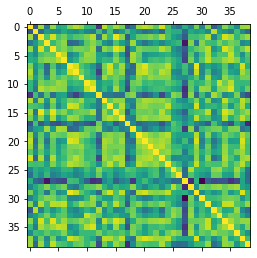

In [2]:
import matplotlib.pyplot as plt

plt.matshow(min_wage_corr)

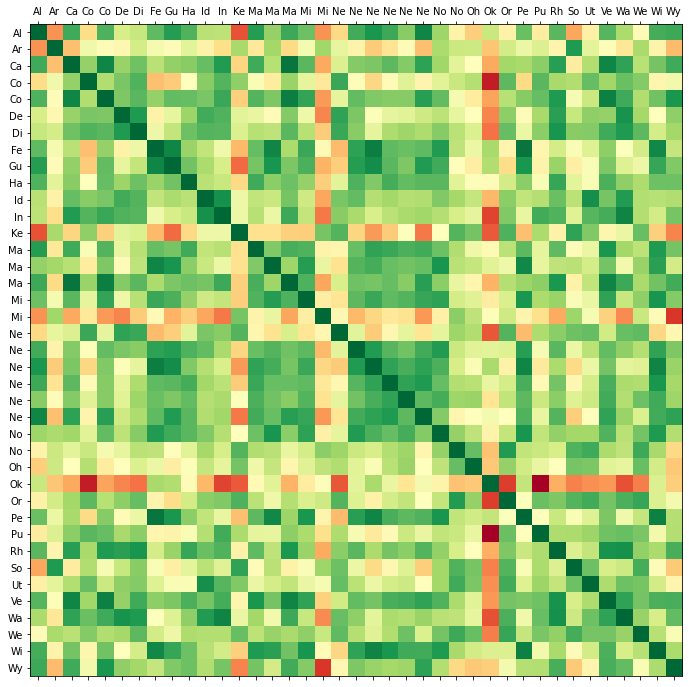

In [3]:
labels = [c[:2] for c in min_wage_corr.columns]

fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111)
ax.matshow(min_wage_corr, cmap = plt.cm.RdYlGn)
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
              
ax.set_yticklabels(labels)
ax.set_xticklabels(labels)

plt.show()
#notice you have overlapping labels? ie problem


In [4]:
import pandas as pd
import requests

web = requests.get("https://www.infoplease.com/state-abbreviations-and-state-postal-codes")
dfs = pd.read_html(web.text)
#pandas readhtml returns a list of data frames based on all the tables it finds

In [7]:
for df in dfs:
    print(df.head())

  State/District Abbreviation Postal Code
0        Alabama         Ala.          AL
1         Alaska       Alaska          AK
2        Arizona        Ariz.          AZ
3       Arkansas         Ark.          AR
4     California       Calif.          CA
  Territory/Associate Abbreviation Postal Code
0      American Samoa          NaN          AS
1                Guam         Guam          GU
2    Marshall Islands          NaN          MH
3          Micronesia          NaN          FM
4   Northern Marianas          NaN          MP


In [9]:
state_abbv = dfs[0]
state_abbv.head()

,State/District,Abbreviation,Postal Code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA


In [10]:
state_abbv.to_csv("state_abbv.csv", index = False)

In [12]:
state_abbv = pd.read_csv("state_abbv.csv", index_col = 0)
state_abbv.head()

,Abbreviation,Postal Code
State/District,,
Alabama,Ala.,AL
Alaska,Alaska,AK
Arizona,Ariz.,AZ
Arkansas,Ark.,AR
California,Calif.,CA


In [20]:
#lets convert the above data frame to a usable and meaningful dictionary:
abbv_dict = state_abbv[["Postal Code"]].to_dict()
abbv_dict = abbv_dict["Postal Code"]
abbv_dict

{'Alabama': 'AL',
 'Alaska': 'AK',
 'Arizona': 'AZ',
 'Arkansas': 'AR',
 'California': 'CA',
 'Colorado': 'CO',
 'Connecticut': 'CT',
 'Delaware': 'DE',
 'District of Columbia': 'DC',
 'Florida': 'FL',
 'Georgia': 'GA',
 'Hawaii': 'HI',
 'Idaho': 'ID',
 'Illinois': 'IL',
 'Indiana': 'IN',
 'Iowa': 'IA',
 'Kansas': 'KS',
 'Kentucky': 'KY',
 'Louisiana': 'LA',
 'Maine': 'ME',
 'Maryland': 'MD',
 'Massachusetts': 'MA',
 'Michigan': 'MI',
 'Minnesota': 'MN',
 'Mississippi': 'MS',
 'Missouri': 'MO',
 'Montana': 'MT',
 'Nebraska': 'NE',
 'Nevada': 'NV',
 'New Hampshire': 'NH',
 'New Jersey': 'NJ',
 'New Mexico': 'NM',
 'New York': 'NY',
 'North Carolina': 'NC',
 'North Dakota': 'ND',
 'Ohio': 'OH',
 'Oklahoma': 'OK',
 'Oregon': 'OR',
 'Pennsylvania': 'PA',
 'Rhode Island': 'RI',
 'South Carolina': 'SC',
 'South Dakota': 'SD',
 'Tennessee': 'TN',
 'Texas': 'TX',
 'Utah': 'UT',
 'Vermont': 'VT',
 'Virginia': 'VA',
 'Washington': 'WA',
 'West Virginia': 'WV',
 'Wisconsin': 'WI',
 'Wyoming': 'WY

In [21]:
labels = [abbv_dict[c] for c in min_wage_corr.columns]

KeyError: 'Federal (FLSA)'

In [25]:
abbv_dict['Federal (FLSA)'] = 'FLSA'
labels = [abbv_dict[c] for c in min_wage_corr.columns]

KeyError: 'Guam'

In [26]:
abbv_dict['Guam'] = 'GU'
labels = [abbv_dict[c] for c in min_wage_corr.columns]

KeyError: 'Puerto Rico'

In [27]:
abbv_dict['Puerto Rico'] = 'PR'
labels = [abbv_dict[c] for c in min_wage_corr.columns]

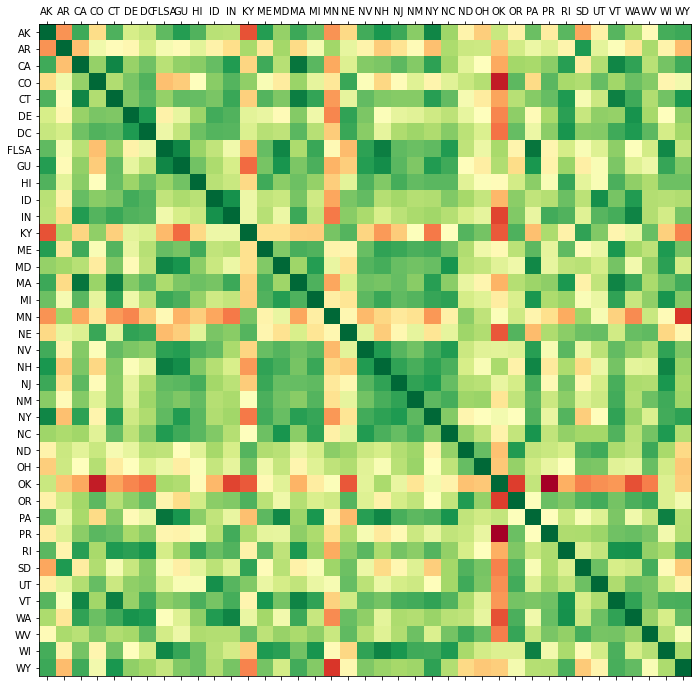

In [28]:
labels = [abbv_dict[c] for c in min_wage_corr.columns]
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111)
ax.matshow(min_wage_corr, cmap = plt.cm.RdYlGn)
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
              
ax.set_yticklabels(labels)
ax.set_xticklabels(labels)

plt.show()